In [57]:
# import statements
import numpy as np
import networkx as nx
from datetime import datetime , timedelta
import random
import networkx as nx
import matplotlib.pyplot as plt

In [58]:
# Input parameters

# Number of Robots
N = int(input("Enter the number of Robots: "))

# Length of the grid
L = int(input("Enter the length of the grid: "))

# Width of the grid
W = int(input("Enter the width of the grid: "))

# Number of packing stations
P = int(input("Enter the Number of packing stations (<= 5): "))

In [59]:
# Order class
class Order:
    def __init__(self, order_num, order_time, item_list, packing_stations):
        # Every order has a unique order_num
        self.order_num = order_num
        # Generated order time
        self.order_time = order_time
        # List of items in the order
        self.item_list = item_list
        # List of available packing stations for the order
        self.packing_stations = packing_stations

# Robot class for Mode 2
class Robot:
    def __init__(self, Id):
        # Every robot has a unique Id
        self.Id = Id
        # List of items the robot will pick for each order in Mode 2
        self.item_list = []
        # Node where the robot is currently present
        self.current_position = 1
        # Completion time of each item in the order
        self.completion_time = []

Delivery Nodes:  [7, 13, 19, 25, 31, 37, 43, 49]
Supply Nodes:  [2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54]


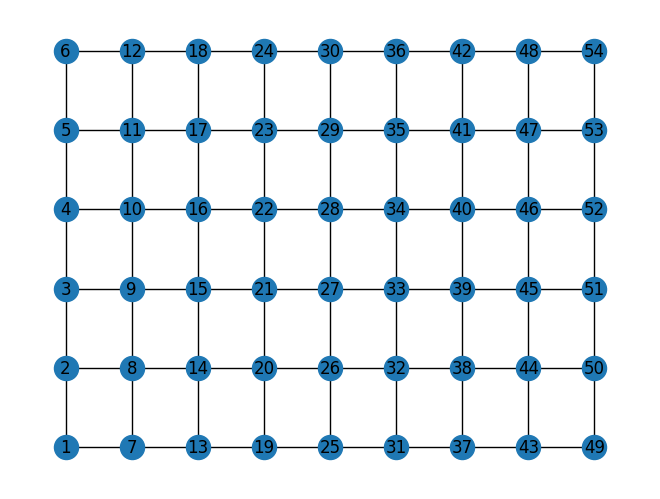

In [60]:
# Creating a LxW grid
grid = nx.grid_2d_graph(L,W)

# Creating a list of delivery nodes
delivery_nodes = []
inital_delivery_node = 1 + L
g = []
for i in range (0, W-1):
    delivery_nodes.append(inital_delivery_node)
    inital_delivery_node += L
print("Delivery Nodes: ", delivery_nodes)

# Initializing the grid nodes and creating a list of supply nodes
supply_nodes = []
node_id = 1
for y in range(W):
    for x in range(L-1, -1, -1):
        grid.nodes[x, y]['node_id'] = node_id
        node_id += 1
        if grid.nodes[x, y]['node_id'] not in delivery_nodes and grid.nodes[x, y]['node_id'] != 1 :
            supply_nodes.append(grid.nodes[x, y]['node_id'])
print("Supply Nodes: ", supply_nodes)

# Map node_id with coordinates
node_id_to_coordinates = {}
for y in range(W):
    for x in range(L-1, -1, -1):
        node_id_to_coordinates[grid.nodes[x, y]['node_id']] = (x,y)

# Visualize the graph using matplotlib
pos = {(x, y): (y, -x) for x, y in grid.nodes()}
nx.draw(grid, pos, labels=nx.get_node_attributes(grid, 'node_id'), with_labels=True)
plt.show()

In [61]:
# Setting mean and variance for the time interval between orders
mean_order_interval = 30
variance_order_interval =25

# Setting mean and variance for the number of items in each order
mean_item_no = 6
variance_item_no = 9

orders = []
# start_time marks the start of the simulation
start_time = datetime.now()
# end_time marks the end of the simulation
end_time = start_time + timedelta(hours = 1)
# order_time marks the time of the order. All orders are generated between start_time and end_time
order_time = datetime.now()
order_num = 1
while order_time < end_time:
    # Generating time interval between orders using normal distribution
    time_interval = max(1, abs(int(np.random.normal(mean_order_interval, variance_order_interval))))
    order_time = order_time + timedelta(seconds = int(time_interval))
    
    # Generating number of items in each order using normal distribution and selecting items from the supply nodes
    item_list_size = max(1, min(int(np.random.normal(mean_item_no, variance_item_no)), len(supply_nodes)))
    item_list = random.sample(supply_nodes, item_list_size)
    item_list = sorted(item_list)
    
    # Generating the number of packing stations for each order based on circular distribution
    num_packing_stations = (order_num-1)%P + 1
    packing_stations = random.sample(delivery_nodes, num_packing_stations)
    
    # Creating an order object
    order = Order(order_num, order_time, item_list, packing_stations)
    orders.append(order)

    order_num += 1

print("Number of orders: ", len(orders))
for order in orders:
    print("Order number: ", order.order_num)
    print("Order time: ", order.order_time)
    print("Item list: ", order.item_list)
    print("Packing stations: ", order.packing_stations)
    print("\n")

Number of orders:  111
Order number:  1
Order time:  2023-10-22 15:29:58.303842
Item list:  [6, 8, 10, 11, 12, 17, 18, 20, 21, 23, 26, 27, 35, 36, 40, 41, 44, 47, 53, 54]
Packing stations:  [37]


Order number:  2
Order time:  2023-10-22 15:29:59.303842
Item list:  [33]
Packing stations:  [31, 25]


Order number:  3
Order time:  2023-10-22 15:30:28.303842
Item list:  [2, 6, 24, 26, 33, 34, 35, 36, 42, 44, 48, 54]
Packing stations:  [19, 49, 7]


Order number:  4
Order time:  2023-10-22 15:30:42.303842
Item list:  [5]
Packing stations:  [43]


Order number:  5
Order time:  2023-10-22 15:31:09.303842
Item list:  [4, 11, 14, 18, 21, 22, 27, 29, 33, 34, 35, 39, 47, 51, 53]
Packing stations:  [49, 7]


Order number:  6
Order time:  2023-10-22 15:32:23.303842
Item list:  [2, 4, 8, 15, 26, 27, 33, 34, 35, 36, 39, 42, 45, 50]
Packing stations:  [49, 7, 37]


Order number:  7
Order time:  2023-10-22 15:32:40.303842
Item list:  [45]
Packing stations:  [31]


Order number:  8
Order time:  2023-10

In [67]:
# Write to csv file in the format order_num, pick_node, completed_time_mode1, completed_time_mode2
# completed_time_mode1 is the time taken to complete the order using the first mode of operation where one robot picks all the items in the order and packs them at the packing station pick_node
# completed_time_mode2 is the time taken to complete the order using the second mode of operation where all robots parallely pick one item at a time and packs it at the packing station pick_node
# The csv file is used to visualize the results in the visualization notebook

with open('orders.csv', 'w') as f:
    # Write the header
    f.write("order_num, pick_node, completed_time_mode1, completed_time_mode2\n")

    # Iterate through each order
    for order in orders:
        print(f"Order {order.order_num}:")
        print(f"Order Time: {order.order_time}")
        print(f"Item List: {order.item_list}")
        print(f"Packing Stations: {order.packing_stations}")

        ''' Mode 1 '''
        print("\nMODE 1")

        # Calculate distance between start node and first item
        total_distance = nx.shortest_path_length(grid, source = node_id_to_coordinates[1], target = node_id_to_coordinates[order.item_list[0]])
        print(f"Node 1 -> Node {order.item_list[0]}: ", total_distance)

        # Calculate distance between each item
        for i in range(len(order.item_list)-1):
            distance = nx.shortest_path_length(grid, source = node_id_to_coordinates[order.item_list[i]], target = node_id_to_coordinates[order.item_list[i+1]])
            print(f"Node {order.item_list[i]} -> Node {order.item_list[i+1]}: ", distance)
            total_distance += distance

        # Choose packing station closest to the last item in the order
        min_distance = 100000
        for packing_station in order.packing_stations:
            distance = nx.shortest_path_length(grid, source = node_id_to_coordinates[order.item_list[len(order.item_list)-1]],target = node_id_to_coordinates[packing_station])
            if distance < min_distance:
                min_distance = distance
                min_packing_station = packing_station
        total_distance += min_distance
        print(f"Node {order.item_list[len(order.item_list)-1]} -> Packing station Node {packing_station}: ", min_distance)

        # Print total distance between start node and packing station
        print(f"Total distance: {total_distance}")

        # Total time is the total distance (1 second / meter) + 5 seconds for each item to pack
        time_taken_mode1 = total_distance + len(order.item_list)*5
        print(f"Time taken: {time_taken_mode1} seconds")
        end_time_mode1 = order.order_time + timedelta(seconds=int(time_taken_mode1))
        print(f"Order Time: {order.order_time} \nEnd Time: {end_time_mode1}")

        ''' Mode 2 '''
        print("\nMODE 2")

        # Setting up robots
        robots = []
        for i in range(N):
            robots.append(Robot(i+1))

        # Assigning items to robots
        for i in range(len(order.item_list)):
            robots[i%N].item_list.append(order.item_list[i])

        # Each robot picks one item at a time and packs it at the packing station before picking the next item
        for robot in robots:
            if len(robot.item_list) == 0:
                continue
            
            # Present time
            initial_time = order.order_time

            print("\nRobot: ", robot.Id)
            # Iterate through each item in the robot's item list
            for item in robot.item_list:
                # Calculate distance between robot's current position and the item
                distance_to_item = nx.shortest_path_length(grid, source = node_id_to_coordinates[robot.current_position], target = node_id_to_coordinates[item])
                print(f"Node {robot.current_position} -> Node {item}: ", distance_to_item)\
                
                # Calculate distance between item and the closest packing station
                min_distance_to_packing_station = 100000
                for packing_station in order.packing_stations:
                    distance_to_packing_station = nx.shortest_path_length(grid, source = node_id_to_coordinates[item],target = node_id_to_coordinates[packing_station])
                    if distance_to_packing_station < min_distance_to_packing_station:
                        min_distance_to_packing_station = distance_to_packing_station
                        min_packing_station = packing_station
                print(f"Node {item} -> Packing station Node {min_packing_station}: ", min_distance_to_packing_station)

                # Update robot's current position to the packing station
                robot.current_position = min_packing_station

                # Print total distance between robot's current position and the packing station
                print(f"Total distance: {distance_to_item + min_distance_to_packing_station}")

                # Total time is the total distance (1 second / meter) + 5 seconds to pack the item
                time_taken_per_item_mode2 = distance_to_item + min_distance_to_packing_station + 5
                print(f"Time taken: {time_taken_per_item_mode2} seconds")
                completion_time_per_item_mode2 = initial_time + timedelta(seconds=int(time_taken_per_item_mode2))
                robot.completion_time.append(completion_time_per_item_mode2)
                initial_time = completion_time_per_item_mode2
                print(f"Order Time: {order.order_time} \nEnd Time: {completion_time_per_item_mode2}")

        # Iterate through each item and write to csv file in ascending order of item number
        for item in order.item_list:
            # Iterate through each robot
            for robot in robots:
                # Iterate through each item in the robot's item list
                for i in range(len(robot.item_list)):
                    if robot.item_list[i] == item:
                        # Write to csv file
                        f.write(f"{order.order_num}, {item}, {end_time_mode1.strftime('%H:%M:%S')}, {robot.completion_time[i].strftime('%H:%M:%S')}\n")
                        break

Order 1:
Order Time: 2023-10-22 15:29:58.303842
Item List: [6, 8, 10, 11, 12, 17, 18, 20, 21, 23, 26, 27, 35, 36, 40, 41, 44, 47, 53, 54]
Packing Stations: [37]

MODE 1
Node 1 -> Node 6:  5
Node 6 -> Node 8:  5
Node 8 -> Node 10:  2
Node 10 -> Node 11:  1
Node 11 -> Node 12:  1
Node 12 -> Node 17:  2
Node 17 -> Node 18:  1
Node 18 -> Node 20:  5
Node 20 -> Node 21:  1
Node 21 -> Node 23:  2
Node 23 -> Node 26:  4
Node 26 -> Node 27:  1
Node 27 -> Node 35:  3
Node 35 -> Node 36:  1
Node 36 -> Node 40:  3
Node 40 -> Node 41:  1
Node 41 -> Node 44:  4
Node 44 -> Node 47:  3
Node 47 -> Node 53:  1
Node 53 -> Node 54:  1
Node 54 -> Packing station Node 37:  7
Total distance: 54
Time taken: 154 seconds
Order Time: 2023-10-22 15:29:58.303842 
End Time: 2023-10-22 15:32:32.303842

MODE 2

Robot:  1
Node 1 -> Node 6:  5
Node 6 -> Packing station Node 37:  11
Total distance: 16
Time taken: 21 seconds
Order Time: 2023-10-22 15:29:58.303842 
End Time: 2023-10-22 15:30:19.303842
Node 37 -> Node 12: